In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preparing and exploring data

In [139]:
df = pd.read_csv("heart_attack_prediction_dataset.csv")
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [140]:
df.head().T   # for showing all columns

,0,1,2,3,4
Patient ID,BMW7812,CZE1114,BNI9906,JLN3497,GFO8847
Age,67,21,21,84,66
Sex,Male,Male,Female,Male,Male
Cholesterol,208,389,324,383,318
Blood Pressure,158/88,165/93,174/99,163/100,91/88
Heart Rate,72,98,72,73,93
Diabetes,0,1,1,1,1
Family History,0,1,0,1,1
Smoking,1,1,0,1,1
Obesity,0,1,0,0,1


In [141]:
df.drop("Patient ID",axis=1,inplace=True)  

In [142]:
df["Heart Attack Risk"].value_counts()  # we can probably say that regular dataset

0    5624
1    3139
Name: Heart Attack Risk, dtype: int64

In [ ]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)

df.drop("Blood Pressure",axis=1,inplace=True) # we don't need it.

In [144]:
df.columns = df.columns.str.replace(" ","_").str.lower()

categorical_columns = list(df.dtypes[df.dtypes=="object"].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ","_")
    
df.head().T

,0,1,2,3,4
age,67,21,21,84,66
sex,male,male,female,male,male
cholesterol,208,389,324,383,318
heart_rate,72,98,72,73,93
diabetes,0,1,1,1,1
family_history,0,1,0,1,1
smoking,1,1,0,1,1
obesity,0,1,0,0,1
alcohol_consumption,0,1,0,1,0
exercise_hours_per_week,4.168189,1.813242,2.078353,9.82813,5.804299


In [145]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print(f"Number of unique values:{df[col].nunique()}")
    print()


age
[67 21 84 66 54 90 20 43 73 71 77 60 88 69 38 50 45 36 48 40 79 63 27 25
 86 42 52 29 30 47 44 33 51 70 85 31 56 24 74 72 55 26 53 46 57 22 35 39
 80 65 83 82 28 19 75 18 34 37 89 32 49 23 59 62 64 61 76 41 87 81 58 78
 68]
73


sex
['male' 'female']
2


cholesterol
[208 389 324 383 318 297 358 220 145 248 373 374 228 259 122 379 166 303
 340 294 359 202 133 159 271 273 328 154 135 197 321 375 360 263 201 347
 129 229 251 121 190 185 279 336 192 180 203 368 222 243 218 120 285 377
 369 311 139 266 153 339 329 333 398 124 183 163 362 390 200 396 255 209
 247 250 227 246 223 330 195 194 178 155 240 237 216 276 224 326 198 301
 314 304 334 213 254 230 316 277 388 206 384 205 261 308 338 382 291 168
 171 378 253 245 226 281 123 173 231 234 268 306 186 293 161 380 239 149
 320 219 335 265 126 307 270 225 193 148 296 136 364 353 252 232 387 299
 357 214 370 345 351 344 152 150 131 272 302 337 170 356 274 188 125 138
 376 181 184 275 394 128 217 399 283 289 284 327 262 212 350 385 162 141

In [146]:
df.shape           # number_rows = 8763 & number_columns = 26 

(8763, 26)

In [147]:
df.isnull().sum()

age                                0
sex                                0
cholesterol                        0
heart_rate                         0
diabetes                           0
family_history                     0
smoking                            0
obesity                            0
alcohol_consumption                0
exercise_hours_per_week            0
diet                               0
previous_heart_problems            0
medication_use                     0
stress_level                       0
sedentary_hours_per_day            0
income                             0
bmi                                0
triglycerides                      0
physical_activity_days_per_week    0
sleep_hours_per_day                0
country                            0
continent                          0
hemisphere                         0
heart_attack_risk                  0
systolic                           0
diastolic                          0
dtype: int64

In [148]:
df.dtypes

age                                  int64
sex                                 object
cholesterol                          int64
heart_rate                           int64
diabetes                             int64
family_history                       int64
smoking                              int64
obesity                              int64
alcohol_consumption                  int64
exercise_hours_per_week            float64
diet                                object
previous_heart_problems              int64
medication_use                       int64
stress_level                         int64
sedentary_hours_per_day            float64
income                               int64
bmi                                float64
triglycerides                        int64
physical_activity_days_per_week      int64
sleep_hours_per_day                  int64
country                             object
continent                           object
hemisphere                          object
heart_attac

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              8763 non-null   int64  
 1   sex                              8763 non-null   object 
 2   cholesterol                      8763 non-null   int64  
 3   heart_rate                       8763 non-null   int64  
 4   diabetes                         8763 non-null   int64  
 5   family_history                   8763 non-null   int64  
 6   smoking                          8763 non-null   int64  
 7   obesity                          8763 non-null   int64  
 8   alcohol_consumption              8763 non-null   int64  
 9   exercise_hours_per_week          8763 non-null   float64
 10  diet                             8763 non-null   object 
 11  previous_heart_problems          8763 non-null   int64  
 12  medication_use      

In [150]:
df.describe()

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,previous_heart_problems,...,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk,systolic,diastolic
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,...,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211,135.075659,85.156111
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,...,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502,26.349976,14.676565
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,...,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,90.000000,60.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,...,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000,112.000000,72.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,...,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000,135.000000,85.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,...,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000,158.000000,98.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,...,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000,180.000000,110.000000


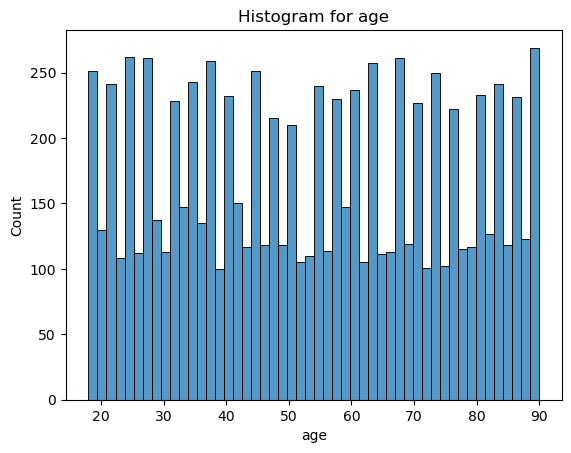

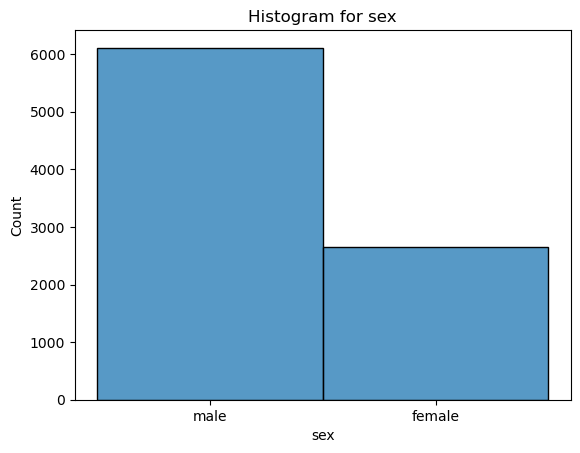

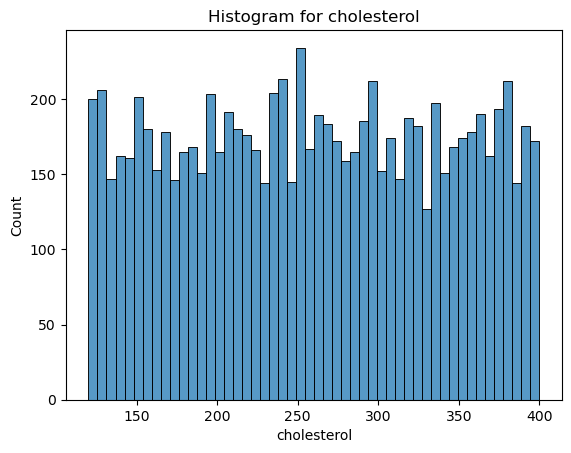

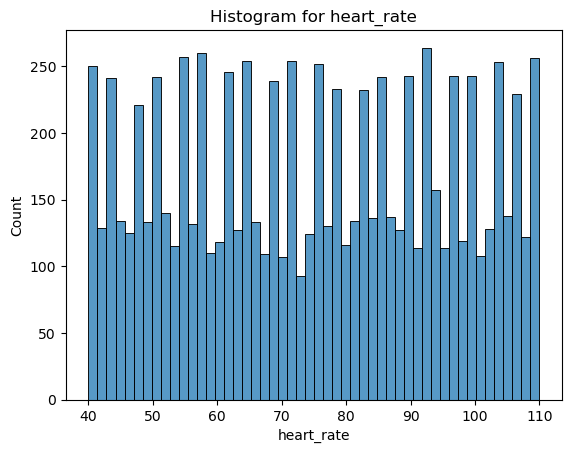

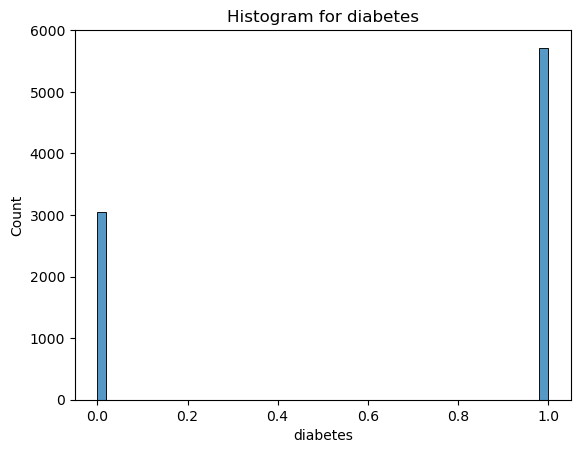

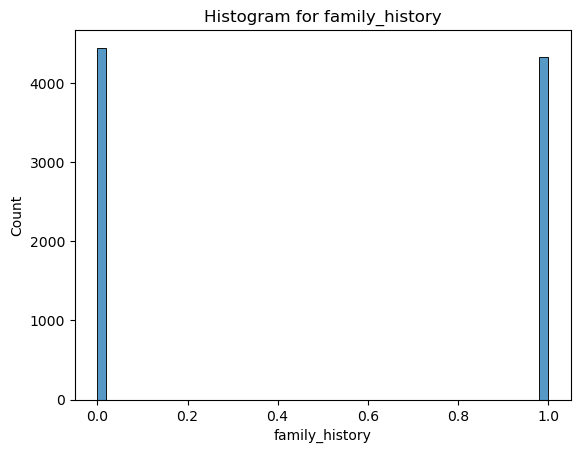

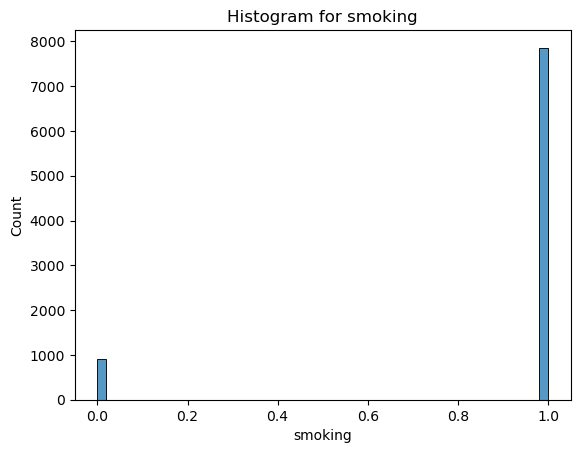

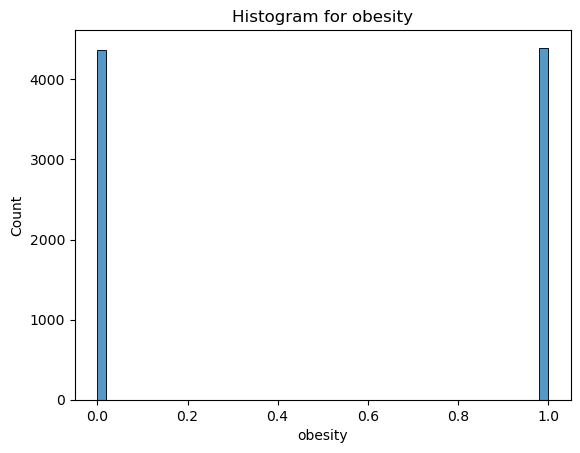

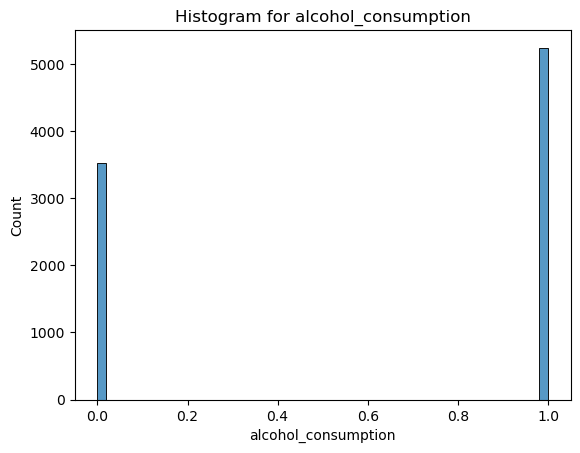

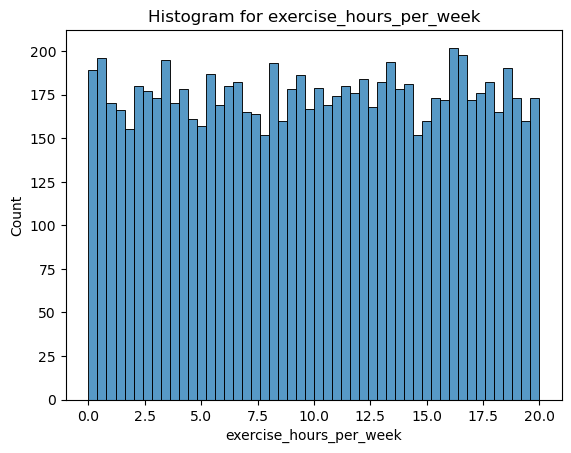

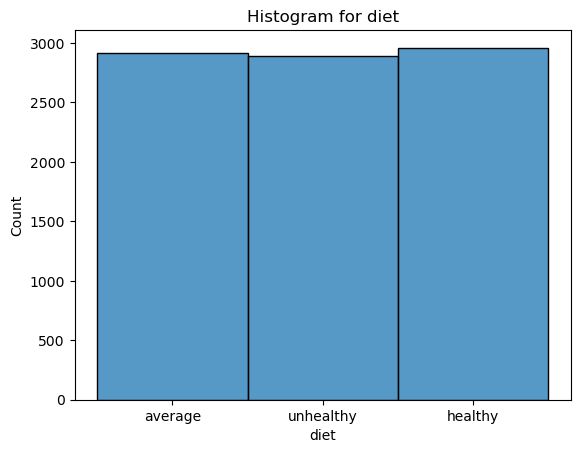

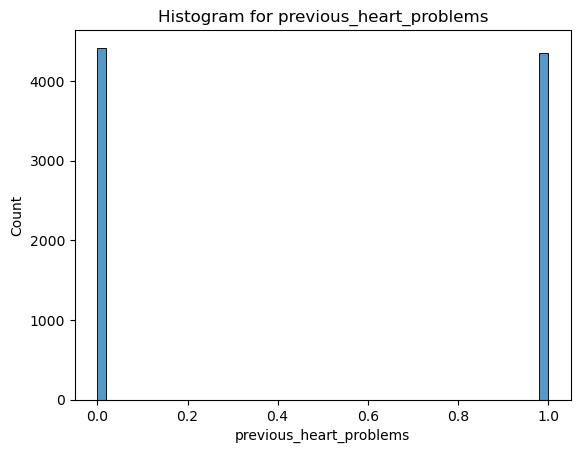

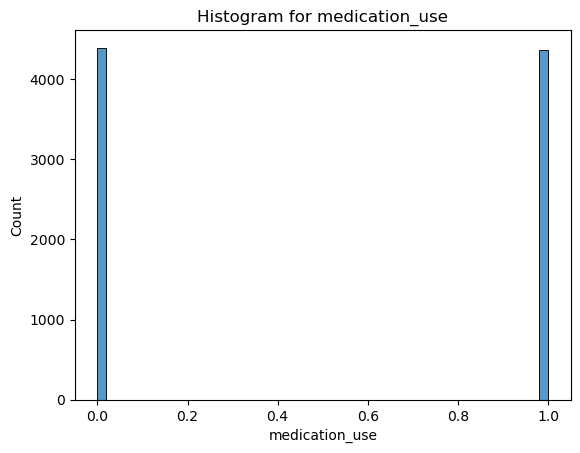

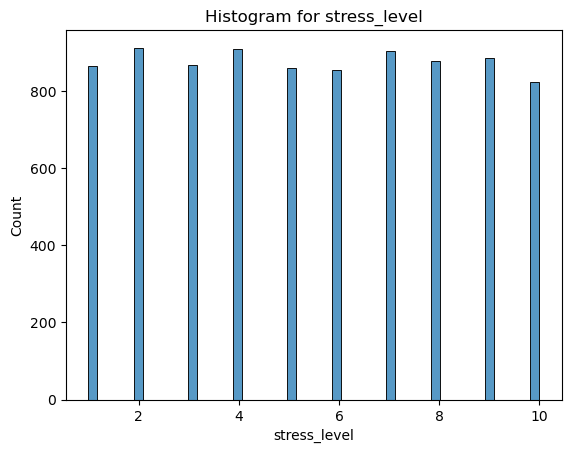

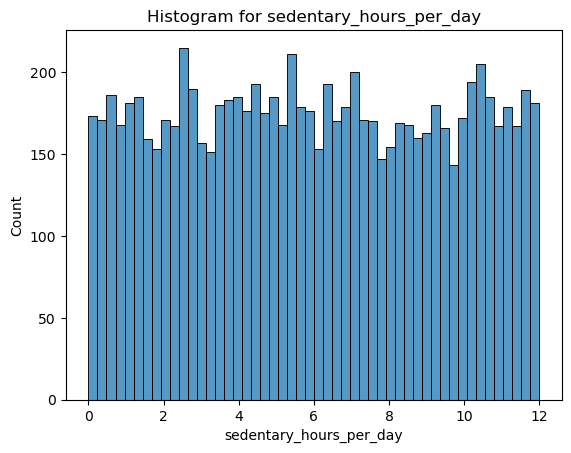

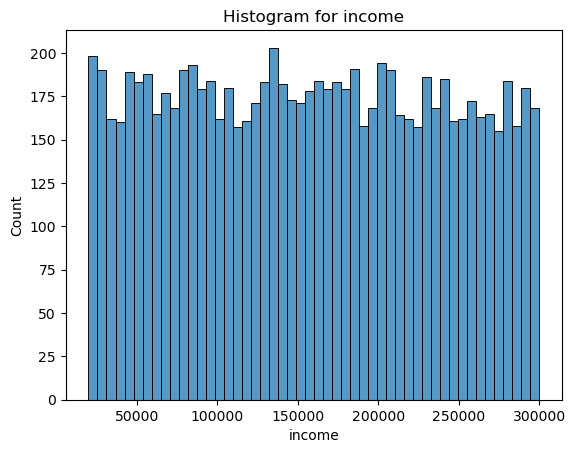

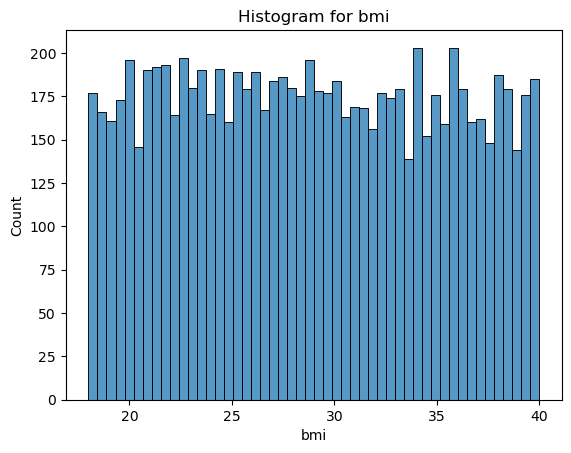

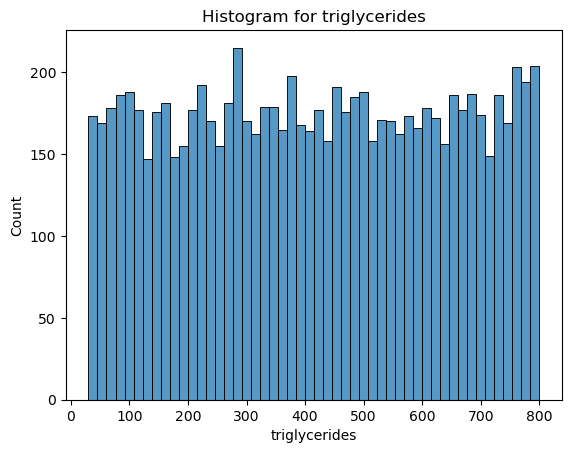

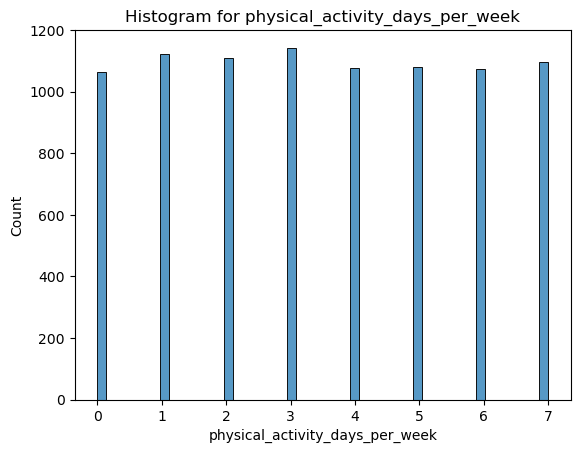

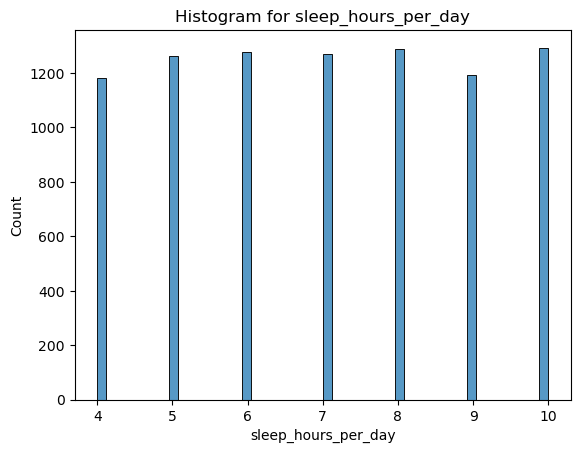

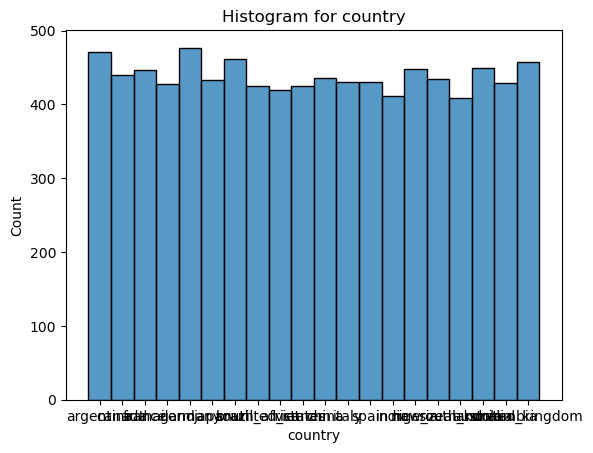

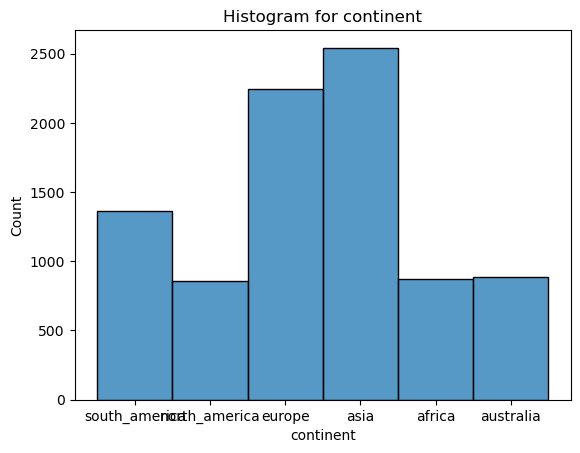

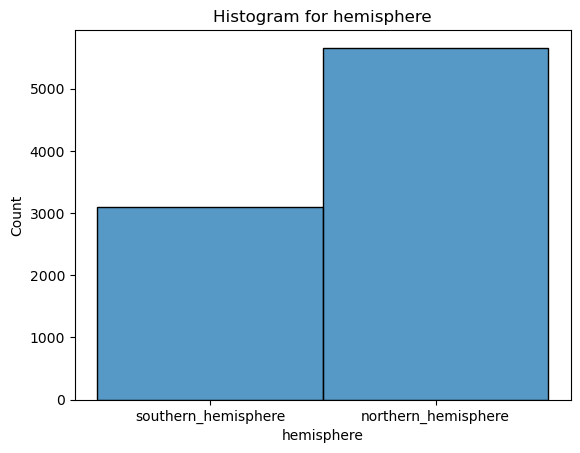

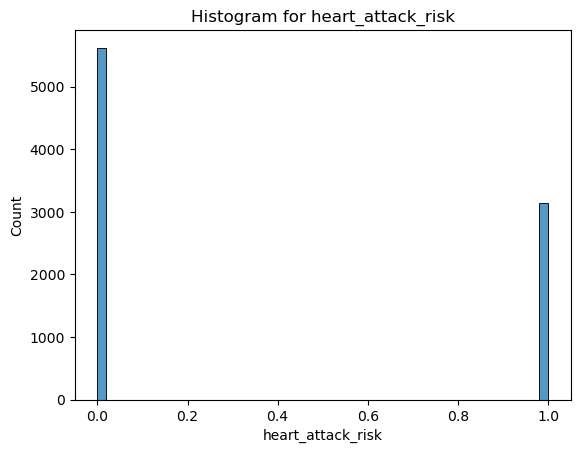

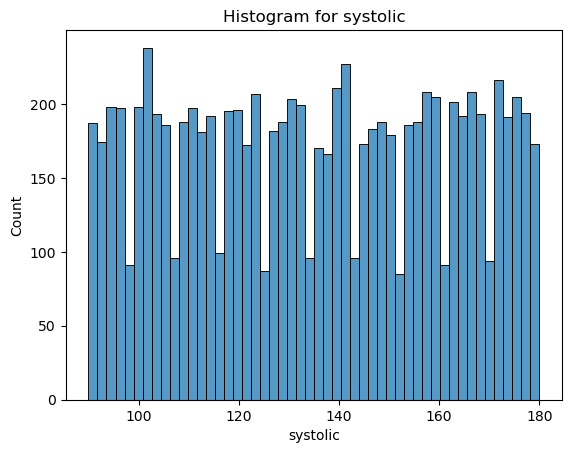

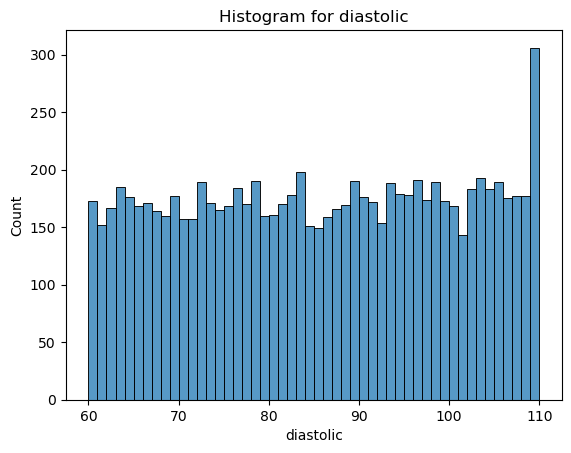

In [151]:
for col in df.columns:
    sns.histplot(df[col], bins=50)
    plt.title(f"Histogram for {col}")
    plt.show()

In [152]:
(df.heart_attack_risk == 1).astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
8758    0
8759    0
8760    1
8761    0
8762    1
Name: heart_attack_risk, Length: 8763, dtype: int32

In [153]:
df.heart_attack_risk = (df.heart_attack_risk == 1).astype(int)
df.head().T

,0,1,2,3,4
age,67,21,21,84,66
sex,male,male,female,male,male
cholesterol,208,389,324,383,318
heart_rate,72,98,72,73,93
diabetes,0,1,1,1,1
family_history,0,1,0,1,1
smoking,1,1,0,1,1
obesity,0,1,0,0,1
alcohol_consumption,0,1,0,1,0
exercise_hours_per_week,4.168189,1.813242,2.078353,9.82813,5.804299


In [154]:
numerical = []
categorical = []

for col in df.columns:
    if df[col].dtypes == "object":
        categorical.append(col)
    else:
        numerical.append(col)
numerical.remove("heart_attack_risk")

In [155]:
numerical

['age',
 'cholesterol',
 'heart_rate',
 'diabetes',
 'family_history',
 'smoking',
 'obesity',
 'alcohol_consumption',
 'exercise_hours_per_week',
 'previous_heart_problems',
 'medication_use',
 'stress_level',
 'sedentary_hours_per_day',
 'income',
 'bmi',
 'triglycerides',
 'physical_activity_days_per_week',
 'sleep_hours_per_day',
 'systolic',
 'diastolic']

In [156]:
categorical

['sex', 'diet', 'country', 'continent', 'hemisphere']

In [157]:
df.dtypes

age                                  int64
sex                                 object
cholesterol                          int64
heart_rate                           int64
diabetes                             int64
family_history                       int64
smoking                              int64
obesity                              int64
alcohol_consumption                  int64
exercise_hours_per_week            float64
diet                                object
previous_heart_problems              int64
medication_use                       int64
stress_level                         int64
sedentary_hours_per_day            float64
income                               int64
bmi                                float64
triglycerides                        int64
physical_activity_days_per_week      int64
sleep_hours_per_day                  int64
country                             object
continent                           object
hemisphere                          object
heart_attac

# Feature Importance: Mutual Information
## a way to measure the importance of categorical variables

In [158]:
from sklearn.metrics import mutual_info_score

In [159]:
def mutual_info_heart_attack_risk_score(series):
    return mutual_info_score(df.heart_attack_risk,series)

In [160]:
df[categorical].apply(mutual_info_heart_attack_risk_score).sort_values(ascending=False)

country       0.001160
continent     0.000219
hemisphere    0.000081
diet          0.000054
sex           0.000005
dtype: float64

In [161]:
df = df.drop(["sex","diet","hemisphere","continent"],axis=1)
categorical = ["country"]

# Feature Importance: Correlation
## a way to measure the importance of numerical variables

In [162]:
df[numerical].corrwith(df.heart_attack_risk).sort_values(ascending=False)

cholesterol                        0.019340
systolic                           0.018585
diabetes                           0.017225
exercise_hours_per_week            0.011133
triglycerides                      0.010471
income                             0.009628
age                                0.006403
medication_use                     0.002234
previous_heart_problems            0.000274
bmi                                0.000020
family_history                    -0.001652
smoking                           -0.004051
stress_level                      -0.004111
heart_rate                        -0.004251
physical_activity_days_per_week   -0.005014
sedentary_hours_per_day           -0.005613
diastolic                         -0.007509
obesity                           -0.013318
alcohol_consumption               -0.013778
sleep_hours_per_day               -0.018528
dtype: float64

In [163]:
correlation_matrix = df[numerical].corr()
correlation_matrix

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,systolic,diastolic
age,1.000000,-0.009107,-0.003844,-0.014105,0.008353,0.394891,-0.008140,-0.006666,0.001206,0.000868,0.000980,0.018307,0.017280,-0.001733,-0.002612,0.003415,0.001384,-0.002185,0.003070,-0.009826
cholesterol,-0.009107,1.000000,0.000315,-0.013428,-0.021608,0.016342,-0.014843,-0.007261,0.021517,-0.006070,-0.000905,-0.024487,0.018914,0.000007,0.017292,-0.005454,0.016056,0.004456,0.000133,0.002083
heart_rate,-0.003844,0.000315,1.000000,0.006764,-0.013470,-0.012331,0.012725,0.003459,0.008276,-0.004956,0.009244,-0.004547,-0.010232,0.004873,0.005299,0.012244,0.000834,0.001811,0.008482,-0.018113
diabetes,-0.014105,-0.013428,0.006764,1.000000,-0.013844,0.000527,0.012866,0.005551,-0.007014,0.000867,-0.002656,0.006719,0.004705,-0.000759,-0.002852,0.010431,-0.002411,-0.012457,-0.005306,-0.000512
family_history,0.008353,-0.021608,-0.013470,-0.013844,1.000000,0.011748,-0.001444,0.012701,-0.006378,-0.004568,0.000981,0.015637,0.002561,-0.000401,-0.011492,-0.001904,0.009561,-0.011199,-0.009762,0.017818
smoking,0.394891,0.016342,-0.012331,0.000527,0.011748,1.000000,0.003969,0.012754,-0.000150,-0.000574,-0.010877,-0.001757,0.015311,0.003096,0.007670,0.004650,-0.006465,-0.005424,-0.009534,-0.012293
obesity,-0.008140,-0.014843,0.012725,0.012866,-0.001444,0.003969,1.000000,-0.024195,0.002099,0.005159,-0.006267,0.010626,-0.001333,-0.003870,-0.006058,0.001467,0.005337,-0.005314,-0.001918,-0.020574
alcohol_consumption,-0.006666,-0.007261,0.003459,0.005551,0.012701,0.012754,-0.024195,1.000000,-0.008514,0.010395,0.003339,-0.005023,-0.012828,-0.022396,0.010562,0.006169,0.001593,-0.000843,0.010764,-0.007282
exercise_hours_per_week,0.001206,0.021517,0.008276,-0.007014,-0.006378,-0.000150,0.002099,-0.008514,1.000000,0.005253,-0.007119,-0.009102,0.008756,-0.023414,0.003777,0.001717,0.007725,-0.001245,-0.009506,-0.003469
previous_heart_problems,0.000868,-0.006070,-0.004956,0.000867,-0.004568,-0.000574,0.005159,0.010395,0.005253,1.000000,0.005336,-0.017629,-0.002694,-0.003281,0.015718,-0.019029,0.008537,0.004460,-0.011926,0.008813


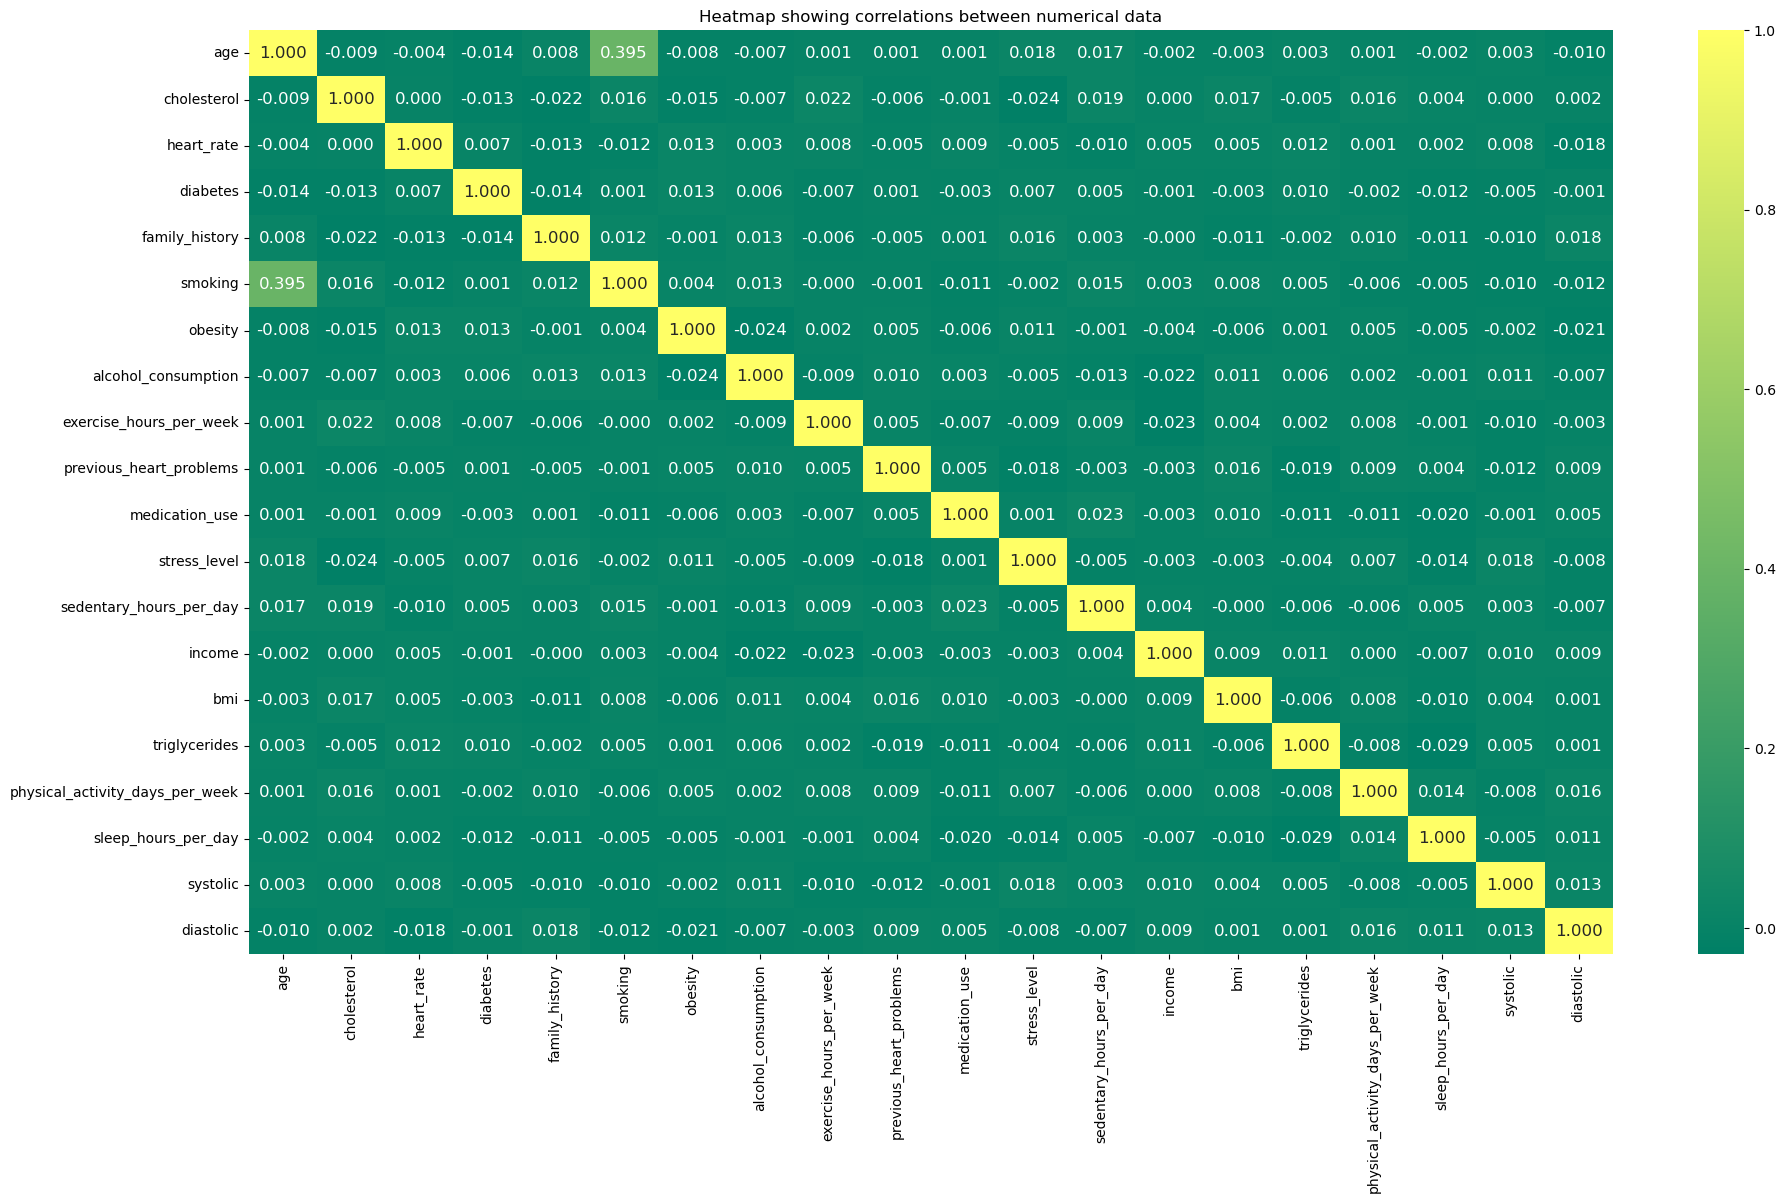

In [164]:
plt.figure(figsize=(22,12))
sns.heatmap(df[numerical].corr(), cmap="summer", annot=True, fmt='.3f',annot_kws={"size": 12})
plt.title('Heatmap showing correlations between numerical data')
plt.show();

In [165]:
df = df.drop(["previous_heart_problems","bmi"],axis=1)
numerical.remove("previous_heart_problems")
numerical.remove("bmi")

In [166]:
df.columns

Index(['age', 'cholesterol', 'heart_rate', 'diabetes', 'family_history',
       'smoking', 'obesity', 'alcohol_consumption', 'exercise_hours_per_week',
       'medication_use', 'stress_level', 'sedentary_hours_per_day', 'income',
       'triglycerides', 'physical_activity_days_per_week',
       'sleep_hours_per_day', 'country', 'heart_attack_risk', 'systolic',
       'diastolic'],
      dtype='object')

# Validation Framework
## train/val/test split with Scikit-Learn 

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

In [169]:
y_train = df_train.heart_attack_risk.values
y_val = df_val.heart_attack_risk.values
y_test = df_test.heart_attack_risk.values

In [170]:
del df_train["heart_attack_risk"]
del df_val["heart_attack_risk"]
del df_test["heart_attack_risk"]

In [171]:
df_train.head()

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,medication_use,stress_level,sedentary_hours_per_day,income,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,systolic,diastolic
7969,89,277,60,0,1,1,0,0,6.515578,0,7,4.764049,96232,240,0,4,south_korea,164,88
4685,61,138,95,1,1,1,0,1,14.383414,1,4,10.417266,66095,689,7,4,germany,115,86
8068,89,400,64,0,1,1,0,0,2.991450,1,8,10.620672,275327,589,2,8,south_africa,114,104
7100,75,364,80,1,0,1,0,1,15.005255,0,1,11.793587,273259,799,4,10,united_states,113,96
5027,42,354,90,1,1,1,0,0,3.292606,0,2,0.710173,287567,542,2,10,france,121,101


In [172]:
y_train

array([1, 1, 1, ..., 0, 1, 0])

# Encoding with DictVectorizer

In [173]:
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [174]:
train_dicts = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dicts)

In [175]:
val_dicts = df_val.to_dict(orient="records")
X_val = dv.transform(val_dicts) 

# Logistic Regression

In [176]:
from sklearn.linear_model import LogisticRegression

In [177]:
thresholds = np.linspace(0.4,0.6,41)
for C in [1,3,5,8,10,12,15,20,25]:
    lr = LogisticRegression(solver="liblinear", C=C, max_iter=1000, random_state=1)
    lr.fit(X_train, y_train)
    for t in thresholds:
        y_pred = lr.predict_proba(X_val)[:,1]
        y_pred = y_pred >= t
        auc = roc_auc_score(y_val, y_pred)
        print(f"C={C}, AUC={auc.round(5)}, Threshold={t.round(3)}")
        
# best parameters C=10, Threshold=0.4 -> AUC=0.50156   

C=1, AUC=0.50156, Threshold=0.4
C=1, AUC=0.50139, Threshold=0.405
C=1, AUC=0.5, Threshold=0.41
C=1, AUC=0.5, Threshold=0.415
C=1, AUC=0.5, Threshold=0.42
C=1, AUC=0.5, Threshold=0.425
C=1, AUC=0.5, Threshold=0.43
C=1, AUC=0.5, Threshold=0.435
C=1, AUC=0.5, Threshold=0.44
C=1, AUC=0.5, Threshold=0.445
C=1, AUC=0.5, Threshold=0.45
C=1, AUC=0.5, Threshold=0.455
C=1, AUC=0.5, Threshold=0.46
C=1, AUC=0.5, Threshold=0.465
C=1, AUC=0.5, Threshold=0.47
C=1, AUC=0.5, Threshold=0.475
C=1, AUC=0.5, Threshold=0.48
C=1, AUC=0.5, Threshold=0.485
C=1, AUC=0.5, Threshold=0.49
C=1, AUC=0.5, Threshold=0.495
C=1, AUC=0.5, Threshold=0.5
C=1, AUC=0.5, Threshold=0.505
C=1, AUC=0.5, Threshold=0.51
C=1, AUC=0.5, Threshold=0.515
C=1, AUC=0.5, Threshold=0.52
C=1, AUC=0.5, Threshold=0.525
C=1, AUC=0.5, Threshold=0.53
C=1, AUC=0.5, Threshold=0.535
C=1, AUC=0.5, Threshold=0.54
C=1, AUC=0.5, Threshold=0.545
C=1, AUC=0.5, Threshold=0.55
C=1, AUC=0.5, Threshold=0.555
C=1, AUC=0.5, Threshold=0.56
C=1, AUC=0.5, Thresho

C=20, AUC=0.5, Threshold=0.505
C=20, AUC=0.5, Threshold=0.51
C=20, AUC=0.5, Threshold=0.515
C=20, AUC=0.5, Threshold=0.52
C=20, AUC=0.5, Threshold=0.525
C=20, AUC=0.5, Threshold=0.53
C=20, AUC=0.5, Threshold=0.535
C=20, AUC=0.5, Threshold=0.54
C=20, AUC=0.5, Threshold=0.545
C=20, AUC=0.5, Threshold=0.55
C=20, AUC=0.5, Threshold=0.555
C=20, AUC=0.5, Threshold=0.56
C=20, AUC=0.5, Threshold=0.565
C=20, AUC=0.5, Threshold=0.57
C=20, AUC=0.5, Threshold=0.575
C=20, AUC=0.5, Threshold=0.58
C=20, AUC=0.5, Threshold=0.585
C=20, AUC=0.5, Threshold=0.59
C=20, AUC=0.5, Threshold=0.595
C=20, AUC=0.5, Threshold=0.6
C=25, AUC=0.50156, Threshold=0.4
C=25, AUC=0.50139, Threshold=0.405
C=25, AUC=0.5, Threshold=0.41
C=25, AUC=0.5, Threshold=0.415
C=25, AUC=0.5, Threshold=0.42
C=25, AUC=0.5, Threshold=0.425
C=25, AUC=0.5, Threshold=0.43
C=25, AUC=0.5, Threshold=0.435
C=25, AUC=0.5, Threshold=0.44
C=25, AUC=0.5, Threshold=0.445
C=25, AUC=0.5, Threshold=0.45
C=25, AUC=0.5, Threshold=0.455
C=25, AUC=0.5, Thr

In [178]:
C=10
Threshold=0.4
lr = LogisticRegression(solver="liblinear", C=C, max_iter=1000, random_state=1)
lr.fit(X_train, y_train)
y_pred = (lr.predict_proba(X_val)[:,1] >= Threshold)
auc = roc_auc_score(y_val, y_pred)
auc

0.5015636927946151

## confusion table

In [179]:
from sklearn.metrics import confusion_matrix

In [180]:
lr = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val) >= 0.5
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1142    0]
 [ 611    0]]


## decision trees

In [181]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [182]:
y_pred = dt.predict_proba(X_val)[:,1]

In [183]:
roc_auc_score(y_val,y_pred)

0.5198926798281539

In [184]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[715 427]
 [372 239]]


In [187]:
for d in [1,2,3,4,5,6,7,8,9,10,15,20,21,22,23,24,25,30,31,32,33,34,35,40,50,100,None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train,y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    print(f"{d} ---> {auc.round(5)}")

1 ---> 0.49754
2 ---> 0.48691
3 ---> 0.50813
4 ---> 0.50915
5 ---> 0.51529
6 ---> 0.53437
7 ---> 0.52016
8 ---> 0.53055
9 ---> 0.51569
10 ---> 0.50727
15 ---> 0.52425
20 ---> 0.52332
21 ---> 0.52184
22 ---> 0.5209
23 ---> 0.52307
24 ---> 0.52522
25 ---> 0.52749
30 ---> 0.52429
31 ---> 0.51075
32 ---> 0.52191
33 ---> 0.50288
34 ---> 0.52171
35 ---> 0.51106
40 ---> 0.51288
50 ---> 0.51234
100 ---> 0.51958
None ---> 0.51461


In [188]:
scores = []
for d in [6,7,8,9,15,20,22,23,25,30,32,34,100]:
    for s in [1,2,5,10,15,20,25,40,50,100,150,200,250,300,350,400,450,500,1000]:
        dt = DecisionTreeClassifier(max_depth=d,min_samples_leaf=s)
        dt.fit(X_train,y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        scores.append((d,s,auc))

In [189]:
df_scores = pd.DataFrame(scores,columns=["depth","min_sample_leaf","auc"])
df_scores = df_scores.sort_values(by="auc",ascending=False)
df_scores

,depth,min_sample_leaf,auc
51,8,300,0.552293
108,20,300,0.552293
165,25,300,0.552293
203,32,300,0.552293
32,7,300,0.552293
...,...,...,...
150,23,500,0.496118
188,30,500,0.496118
17,6,500,0.496118
207,32,500,0.496118


In [191]:
df_scores[df_scores.auc >= 0.552]  # I will use 8, 300  

,depth,min_sample_leaf,auc
51,8,300,0.552293
108,20,300,0.552293
165,25,300,0.552293
203,32,300,0.552293
32,7,300,0.552293
222,34,300,0.552293
89,15,300,0.552293
146,23,300,0.552293
70,9,300,0.552293
241,100,300,0.552293


<Axes: xlabel='None-depth', ylabel='min_sample_leaf'>

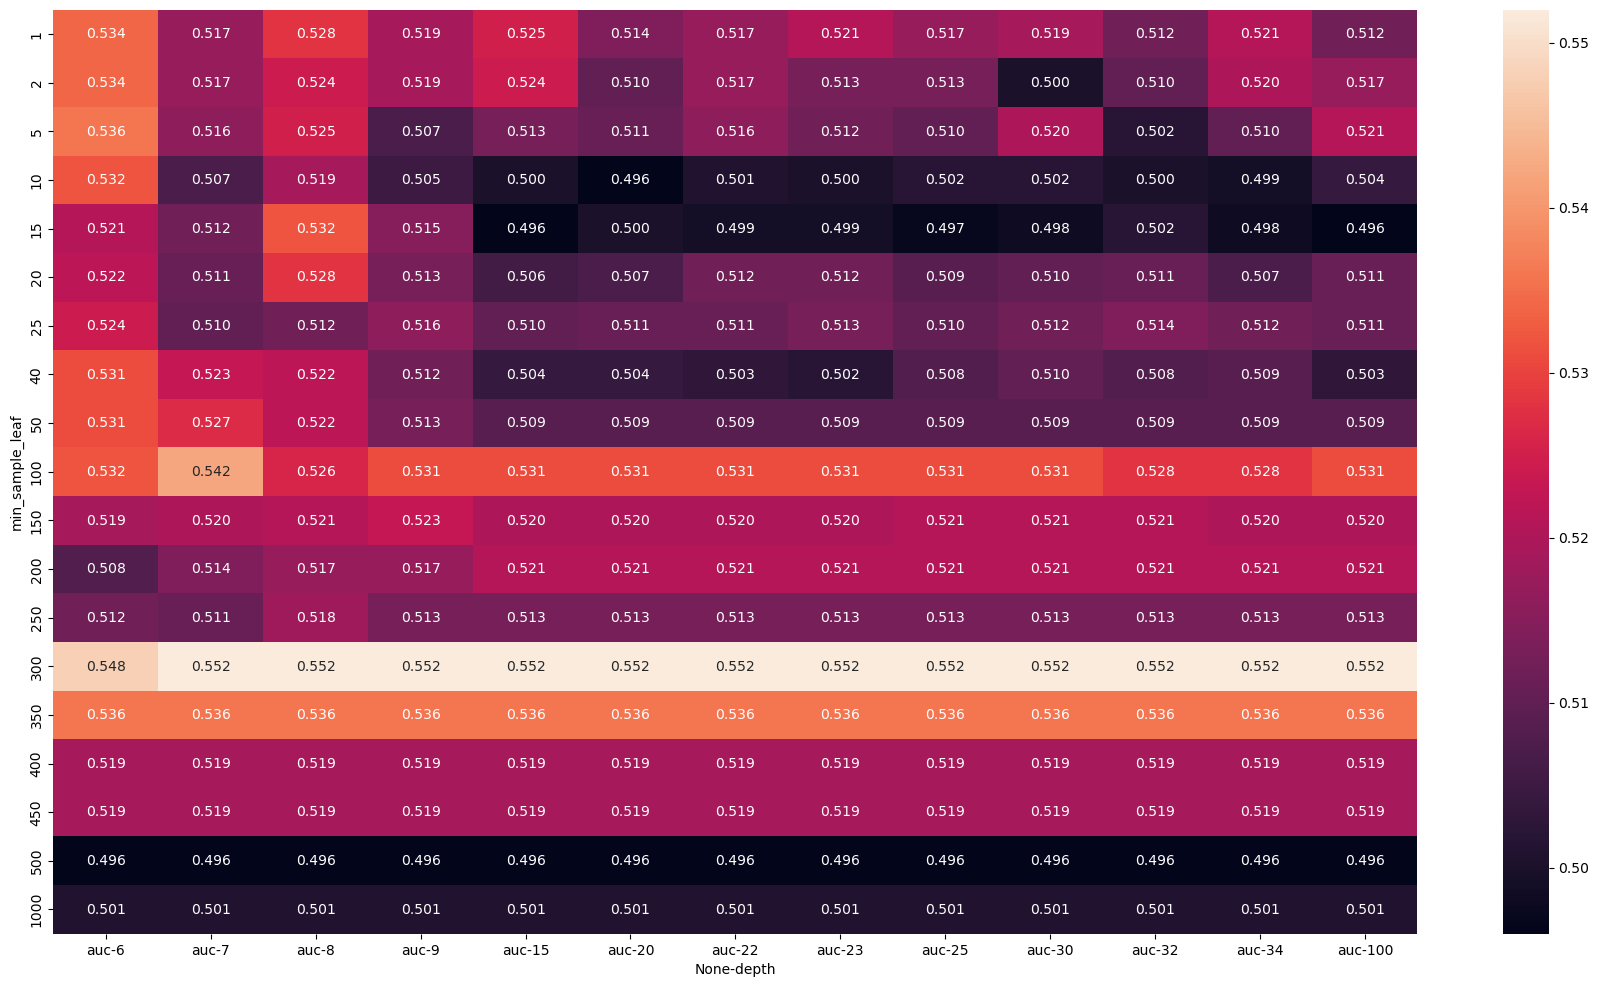

In [192]:
plt.figure(figsize=(22,12))
df_scores_pivot = df_scores.pivot(index="min_sample_leaf",columns=["depth"],values=["auc"])
sns.heatmap(df_scores_pivot.round(3),annot=True,fmt=".3f")

In [222]:
dt = DecisionTreeClassifier(max_depth=8,min_samples_leaf=300)
dt.fit(X_train,y_train)
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.5522928124460195

## Random Forest

In [193]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
for d in [6,7,8,10,12,15,20,21,22,23,25,30,50,100]:
    rf = RandomForestClassifier(n_estimators=10,max_depth=d)
    rf.fit(X_train,y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    print(f"{d} ---> {auc.round(5)}")

6 ---> 0.52116
7 ---> 0.52127
8 ---> 0.52469
10 ---> 0.53228
12 ---> 0.50529
15 ---> 0.51918
20 ---> 0.52335
21 ---> 0.51082
22 ---> 0.53498
23 ---> 0.50824
25 ---> 0.52384
30 ---> 0.52411
50 ---> 0.51723
100 ---> 0.52107


In [223]:
scores = []
probably_depth = [8,10,20,22,25,30,100]
for d in probably_depth:
    for s in [1,2,5,10,15,20,25,40,50,100,150,200,250,300,350,400,450,500,1000]:
        rf = RandomForestClassifier(max_depth=d,min_samples_leaf=s,random_state=1)
        rf.fit(X_train,y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        scores.append((d,s,auc))

In [224]:
df_scores = pd.DataFrame(scores,columns=["depth","min_sample_leaf","auc"])
df_scores = df_scores.sort_values(by="auc",ascending=False)
df_scores.head(10)

,depth,min_sample_leaf,auc
99,30,15,0.536957
118,100,15,0.536377
80,25,15,0.535920
9,8,100,0.534912
28,10,100,0.534486
66,22,100,0.533983
85,25,100,0.533983
104,30,100,0.533983
47,20,100,0.533983
123,100,100,0.533983


In [200]:
scores = []
probably_depth = [8,10,20,22,25,30,100]
probably_s = [250,150,100,40,100,350]
for d in probably_depth:                       
    for s in probably_s:
        for n in range(10,201,10):            
            rf = RandomForestClassifier(n_estimators=n,max_depth=d,min_samples_leaf=s,random_state=1) 
            rf.fit(X_train,y_train)
            y_pred = rf.predict_proba(X_val)[:,1]
            auc = roc_auc_score(y_val,y_pred)
            scores.append((d,s,n,auc))
            
df_scores = pd.DataFrame(scores,columns=["max_depth","min_samples_leaf","n_estimators","auc"])
df_scores.head()

,max_depth,min_samples_leaf,n_estimators,auc
0,8,250,10,0.513754
1,8,250,20,0.519673
2,8,250,30,0.534376
3,8,250,40,0.531860
4,8,250,50,0.530818


In [201]:
df_scores = df_scores.sort_values(by="auc",ascending=False)
df_scores.head(10)

,max_depth,min_samples_leaf,n_estimators,auc
300,20,40,10,0.541582
420,22,40,10,0.541340
780,100,40,10,0.541340
540,25,40,10,0.541340
660,30,40,10,0.541340
302,20,40,30,0.539228
301,20,40,20,0.538136
562,25,100,30,0.537297
802,100,100,30,0.537297
442,22,100,30,0.537297


In [230]:
n = 10
d = 20
s = 40
rf = RandomForestClassifier(n_estimators=n,max_depth=d,min_samples_leaf=s,random_state=1)
rf.fit(X_train,y_train)
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.5415823874559101

## XGBoost

In [206]:
import xgboost as xgb

features = dv.get_feature_names_out().tolist()

dtrain = xgb.DMatrix(X_train,label=y_train,feature_names=features)
dval = xgb.DMatrix(X_val,label=y_val,feature_names=features)

In [207]:
xgb_params = {
    "eta" : 0.1,                     
    "max_depth" : 10,
    "min_child_weight": 3,          
    "eval_metric": "auc",
    "objective": "binary:logistic", 
    "nthread": 8,                    
    "seed": 1,                       
    "verbosity": 1                   
}


watchlist = [(dtrain,"train"),(dval,"val")]

model = xgb.train(xgb_params,dtrain,num_boost_round=200,verbose_eval=5,evals=watchlist)

[0]	train-auc:0.64419	val-auc:0.50045
[5]	train-auc:0.87492	val-auc:0.50274
[10]	train-auc:0.93045	val-auc:0.51593
[15]	train-auc:0.94854	val-auc:0.51736
[20]	train-auc:0.96469	val-auc:0.51724
[25]	train-auc:0.97761	val-auc:0.51918
[30]	train-auc:0.98605	val-auc:0.52102
[35]	train-auc:0.99087	val-auc:0.52309
[40]	train-auc:0.99442	val-auc:0.52182
[45]	train-auc:0.99663	val-auc:0.52331
[50]	train-auc:0.99775	val-auc:0.52067
[55]	train-auc:0.99830	val-auc:0.51687
[60]	train-auc:0.99861	val-auc:0.51648
[65]	train-auc:0.99900	val-auc:0.51677
[70]	train-auc:0.99936	val-auc:0.51715
[75]	train-auc:0.99959	val-auc:0.51079
[80]	train-auc:0.99976	val-auc:0.50856
[85]	train-auc:0.99987	val-auc:0.51275
[90]	train-auc:0.99992	val-auc:0.51181
[95]	train-auc:0.99996	val-auc:0.50975
[100]	train-auc:0.99998	val-auc:0.50955
[105]	train-auc:0.99999	val-auc:0.51171
[110]	train-auc:0.99999	val-auc:0.51250
[115]	train-auc:0.99999	val-auc:0.51221
[120]	train-auc:1.00000	val-auc:0.51178
[125]	train-auc:1.0000

In [208]:
eta_current = [0.01,0.03,0.1,0.3,0.5]     
watchlist = [(dtrain,"train"),(dval,"val")]

for my_eta in eta_current:
    print("eta:",my_eta)
    xgb_params = {
        "eta" : my_eta,                     
        "max_depth" : 6,
        "min_child_weight": 1,           
        "eval_metric": "auc",
        "objective": "binary:logistic",  
        "nthread": 8,                    
        "seed": 1,                       
        "verbosity": 1                   
    }
    
    model = xgb.train(xgb_params,dtrain,num_boost_round=200,evals=watchlist,verbose_eval=5)
    
# eta:0,3 [95]	train-auc:0.91267	val-auc:0.51731 best one

eta: 0.01
[0]	train-auc:0.58829	val-auc:0.50104
[5]	train-auc:0.61682	val-auc:0.49112
[10]	train-auc:0.66114	val-auc:0.49354
[15]	train-auc:0.70324	val-auc:0.49565
[20]	train-auc:0.71733	val-auc:0.49887
[25]	train-auc:0.72929	val-auc:0.49997
[30]	train-auc:0.74436	val-auc:0.50662
[35]	train-auc:0.75330	val-auc:0.50258
[40]	train-auc:0.75642	val-auc:0.50462
[45]	train-auc:0.76158	val-auc:0.50149
[50]	train-auc:0.77083	val-auc:0.50187
[55]	train-auc:0.77730	val-auc:0.50106
[60]	train-auc:0.78164	val-auc:0.50203
[65]	train-auc:0.78635	val-auc:0.50229
[70]	train-auc:0.79113	val-auc:0.50368
[75]	train-auc:0.80086	val-auc:0.50567
[80]	train-auc:0.80796	val-auc:0.50600
[85]	train-auc:0.81292	val-auc:0.50491
[90]	train-auc:0.81782	val-auc:0.50474
[95]	train-auc:0.82260	val-auc:0.50376
[100]	train-auc:0.82478	val-auc:0.50396
[105]	train-auc:0.82695	val-auc:0.50301
[110]	train-auc:0.82930	val-auc:0.50230
[115]	train-auc:0.83103	val-auc:0.50204
[120]	train-auc:0.83400	val-auc:0.50258
[125]	train-

In [209]:
max_depth = [2,3,5,6,8,10,12,15]
watchlist = [(dtrain,"train"),(dval,"val")]

for current_depth in max_depth:
    print("current_depth:",current_depth)
    xgb_params = {
        "eta" : 0.03,                     
        "max_depth" : current_depth,
        "min_child_weight": 1,           
        "eval_metric": "auc",
        "objective": "binary:logistic",  
        "nthread": 8,                    
        "seed": 1,                       
        "verbosity": 1                   
    }
    
    model = xgb.train(xgb_params,dtrain,num_boost_round=200,evals=watchlist,verbose_eval=5)

# current_depth: 2 [90] train-auc:0.61307 val-auc:0.52663  best one

current_depth: 2
[0]	train-auc:0.51826	val-auc:0.49246
[5]	train-auc:0.56422	val-auc:0.49822
[10]	train-auc:0.57137	val-auc:0.50127
[15]	train-auc:0.57989	val-auc:0.51069
[20]	train-auc:0.58329	val-auc:0.51284
[25]	train-auc:0.58566	val-auc:0.51444
[30]	train-auc:0.59031	val-auc:0.51547
[35]	train-auc:0.59206	val-auc:0.51608
[40]	train-auc:0.59449	val-auc:0.51976
[45]	train-auc:0.59664	val-auc:0.52091
[50]	train-auc:0.59800	val-auc:0.52318
[55]	train-auc:0.60259	val-auc:0.52264
[60]	train-auc:0.60376	val-auc:0.52634
[65]	train-auc:0.60596	val-auc:0.52461
[70]	train-auc:0.60795	val-auc:0.52523
[75]	train-auc:0.60998	val-auc:0.52540
[80]	train-auc:0.61118	val-auc:0.52540
[85]	train-auc:0.61216	val-auc:0.52554
[90]	train-auc:0.61307	val-auc:0.52663
[95]	train-auc:0.61452	val-auc:0.52538
[100]	train-auc:0.61626	val-auc:0.52416
[105]	train-auc:0.61667	val-auc:0.52316
[110]	train-auc:0.61832	val-auc:0.52276
[115]	train-auc:0.61896	val-auc:0.52208
[120]	train-auc:0.62070	val-auc:0.52075
[125]

[0]	train-auc:0.67108	val-auc:0.48839
[5]	train-auc:0.87402	val-auc:0.48945
[10]	train-auc:0.91778	val-auc:0.49719
[15]	train-auc:0.93533	val-auc:0.49685
[20]	train-auc:0.95108	val-auc:0.49189
[25]	train-auc:0.96189	val-auc:0.50191
[30]	train-auc:0.96882	val-auc:0.50300
[35]	train-auc:0.97743	val-auc:0.50460
[40]	train-auc:0.98287	val-auc:0.50387
[45]	train-auc:0.98635	val-auc:0.50596
[50]	train-auc:0.98893	val-auc:0.50598
[55]	train-auc:0.99105	val-auc:0.50584
[60]	train-auc:0.99221	val-auc:0.50473
[65]	train-auc:0.99448	val-auc:0.50370
[70]	train-auc:0.99601	val-auc:0.50435
[75]	train-auc:0.99649	val-auc:0.50440
[80]	train-auc:0.99717	val-auc:0.50460
[85]	train-auc:0.99752	val-auc:0.50468
[90]	train-auc:0.99803	val-auc:0.50467
[95]	train-auc:0.99818	val-auc:0.50388
[100]	train-auc:0.99828	val-auc:0.50405
[105]	train-auc:0.99864	val-auc:0.50524
[110]	train-auc:0.99875	val-auc:0.50399
[115]	train-auc:0.99883	val-auc:0.50467
[120]	train-auc:0.99897	val-auc:0.50430
[125]	train-auc:0.9991

In [213]:
min_child_weight = [1,3,5,10,20,30,50,100]      
watchlist = [(dtrain,"train"),(dval,"val")]

for current_min_child_weight in min_child_weight:
    print("current_min_child_weight:",current_min_child_weight)
    xgb_params = {
        "eta" : 0.03,                     
        "max_depth" : 2,
        "min_child_weight": current_min_child_weight,           
        "eval_metric": "auc",
        "objective": "binary:logistic",  
        "nthread": 8,                    
        "seed": 1,                       
        "verbosity": 1                   
    }
    
    model = xgb.train(xgb_params,dtrain,num_boost_round=400,evals=watchlist,verbose_eval=5)
    print()
    
#current_min_child_weight: 50 [95]	train-auc:0.59145	val-auc:0.54026

current_min_child_weight: 1
[0]	train-auc:0.51826	val-auc:0.49246
[5]	train-auc:0.56422	val-auc:0.49822
[10]	train-auc:0.57137	val-auc:0.50127
[15]	train-auc:0.57989	val-auc:0.51069
[20]	train-auc:0.58329	val-auc:0.51284
[25]	train-auc:0.58566	val-auc:0.51444
[30]	train-auc:0.59031	val-auc:0.51547
[35]	train-auc:0.59206	val-auc:0.51608
[40]	train-auc:0.59449	val-auc:0.51976
[45]	train-auc:0.59664	val-auc:0.52091
[50]	train-auc:0.59800	val-auc:0.52318
[55]	train-auc:0.60259	val-auc:0.52264
[60]	train-auc:0.60376	val-auc:0.52634
[65]	train-auc:0.60596	val-auc:0.52461
[70]	train-auc:0.60795	val-auc:0.52523
[75]	train-auc:0.60998	val-auc:0.52540
[80]	train-auc:0.61118	val-auc:0.52540
[85]	train-auc:0.61216	val-auc:0.52554
[90]	train-auc:0.61307	val-auc:0.52663
[95]	train-auc:0.61452	val-auc:0.52538
[100]	train-auc:0.61626	val-auc:0.52416
[105]	train-auc:0.61667	val-auc:0.52316
[110]	train-auc:0.61832	val-auc:0.52276
[115]	train-auc:0.61896	val-auc:0.52208
[120]	train-auc:0.62070	val-auc:0.

[215]	train-auc:0.64186	val-auc:0.52259
[220]	train-auc:0.64350	val-auc:0.52164
[225]	train-auc:0.64404	val-auc:0.52185
[230]	train-auc:0.64549	val-auc:0.52164
[235]	train-auc:0.64627	val-auc:0.52251
[240]	train-auc:0.64716	val-auc:0.52210
[245]	train-auc:0.64796	val-auc:0.52145
[250]	train-auc:0.64838	val-auc:0.52088
[255]	train-auc:0.64877	val-auc:0.52113
[260]	train-auc:0.65050	val-auc:0.52202
[265]	train-auc:0.65087	val-auc:0.52180
[270]	train-auc:0.65256	val-auc:0.52021
[275]	train-auc:0.65349	val-auc:0.52118
[280]	train-auc:0.65454	val-auc:0.52077
[285]	train-auc:0.65558	val-auc:0.51980
[290]	train-auc:0.65673	val-auc:0.51971
[295]	train-auc:0.65682	val-auc:0.52049
[300]	train-auc:0.65794	val-auc:0.52114
[305]	train-auc:0.65900	val-auc:0.52064
[310]	train-auc:0.65945	val-auc:0.52075
[315]	train-auc:0.66002	val-auc:0.52076
[320]	train-auc:0.66086	val-auc:0.51980
[325]	train-auc:0.66186	val-auc:0.51979
[330]	train-auc:0.66216	val-auc:0.51974
[335]	train-auc:0.66240	val-auc:0.51984


[20]	train-auc:0.58262	val-auc:0.50942
[25]	train-auc:0.58527	val-auc:0.51152
[30]	train-auc:0.58847	val-auc:0.51260
[35]	train-auc:0.59185	val-auc:0.51640
[40]	train-auc:0.59325	val-auc:0.51762
[45]	train-auc:0.59375	val-auc:0.51832
[50]	train-auc:0.59552	val-auc:0.51990
[55]	train-auc:0.59802	val-auc:0.51896
[60]	train-auc:0.59768	val-auc:0.51993
[65]	train-auc:0.59926	val-auc:0.52116
[70]	train-auc:0.59984	val-auc:0.52118
[75]	train-auc:0.60074	val-auc:0.52286
[80]	train-auc:0.60183	val-auc:0.52213
[85]	train-auc:0.60264	val-auc:0.52154
[90]	train-auc:0.60384	val-auc:0.52145
[95]	train-auc:0.60429	val-auc:0.52258
[100]	train-auc:0.60561	val-auc:0.52339
[105]	train-auc:0.60647	val-auc:0.52347
[110]	train-auc:0.60757	val-auc:0.52326
[115]	train-auc:0.60914	val-auc:0.52345
[120]	train-auc:0.60979	val-auc:0.52354
[125]	train-auc:0.61096	val-auc:0.52370
[130]	train-auc:0.61204	val-auc:0.52323
[135]	train-auc:0.61290	val-auc:0.52331
[140]	train-auc:0.61471	val-auc:0.52335
[145]	train-auc:

[235]	train-auc:0.61244	val-auc:0.53061
[240]	train-auc:0.61287	val-auc:0.53021
[245]	train-auc:0.61325	val-auc:0.53006
[250]	train-auc:0.61370	val-auc:0.53044
[255]	train-auc:0.61421	val-auc:0.53016
[260]	train-auc:0.61456	val-auc:0.53013
[265]	train-auc:0.61500	val-auc:0.53024
[270]	train-auc:0.61536	val-auc:0.53051
[275]	train-auc:0.61612	val-auc:0.53010
[280]	train-auc:0.61629	val-auc:0.53027
[285]	train-auc:0.61741	val-auc:0.53018
[290]	train-auc:0.61744	val-auc:0.53069
[295]	train-auc:0.61788	val-auc:0.53048
[300]	train-auc:0.61848	val-auc:0.53007
[305]	train-auc:0.61923	val-auc:0.52977
[310]	train-auc:0.61969	val-auc:0.52978
[315]	train-auc:0.62005	val-auc:0.53014
[320]	train-auc:0.62039	val-auc:0.53011
[325]	train-auc:0.62077	val-auc:0.53050
[330]	train-auc:0.62153	val-auc:0.53113
[335]	train-auc:0.62184	val-auc:0.53072
[340]	train-auc:0.62251	val-auc:0.53014
[345]	train-auc:0.62298	val-auc:0.53083
[350]	train-auc:0.62333	val-auc:0.53106
[355]	train-auc:0.62346	val-auc:0.53142


In [220]:
xgb_params = {
        "eta" : 0.03,                     
        "max_depth" : 2,
        "min_child_weight": 50,           
        "eval_metric": "auc",
        "objective": "binary:logistic",  
        "nthread": 8,                    
        "seed": 1,                       
        "verbosity": 1                   
    }
    
model = xgb.train(xgb_params,dtrain,num_boost_round=98,evals=watchlist,verbose_eval=1)

[0]	train-auc:0.52149	val-auc:0.50388
[1]	train-auc:0.52985	val-auc:0.49882
[2]	train-auc:0.54488	val-auc:0.49912
[3]	train-auc:0.54415	val-auc:0.49961
[4]	train-auc:0.54486	val-auc:0.49860
[5]	train-auc:0.54631	val-auc:0.50078
[6]	train-auc:0.54614	val-auc:0.49942
[7]	train-auc:0.54785	val-auc:0.50175
[8]	train-auc:0.55339	val-auc:0.50230
[9]	train-auc:0.55865	val-auc:0.51213
[10]	train-auc:0.56147	val-auc:0.51895
[11]	train-auc:0.56164	val-auc:0.51878
[12]	train-auc:0.56122	val-auc:0.51863
[13]	train-auc:0.56402	val-auc:0.51685
[14]	train-auc:0.56597	val-auc:0.51879
[15]	train-auc:0.56816	val-auc:0.52001
[16]	train-auc:0.56788	val-auc:0.52050
[17]	train-auc:0.56800	val-auc:0.52497
[18]	train-auc:0.56859	val-auc:0.52702
[19]	train-auc:0.57017	val-auc:0.52398
[20]	train-auc:0.56992	val-auc:0.52379
[21]	train-auc:0.56983	val-auc:0.52304
[22]	train-auc:0.56901	val-auc:0.52265
[23]	train-auc:0.57021	val-auc:0.52243
[24]	train-auc:0.57030	val-auc:0.52335
[25]	train-auc:0.57106	val-auc:0.52

## RESULT

In [227]:
dt = DecisionTreeClassifier(max_depth=8,min_samples_leaf=300)
dt.fit(X_train,y_train)
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.5522928124460195

## Final Model

In [232]:
dv_full = DictVectorizer(sparse=False)

In [233]:
dict_full_train = df_full_train.to_dict(orient="records")
X_full_train = dv_full.fit_transform(dict_full_train)
y_full_train = df_full_train.heart_attack_risk.values

In [236]:
model = DecisionTreeClassifier(max_depth=8,min_samples_leaf=300)
model.fit(X_full_train,y_full_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=300)

In [237]:
dicts_test = df_test.to_dict(orient="records")
X_test = dv_full.transform(dicts_test)

In [244]:
y_pred = model.predict_proba(X_test)[:,1] 

array([0., 0., 0., ..., 0., 0., 0.])